In [3]:
import cv2
import os 
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
## Crop images
def crop_image(input):
    img = cv2.imread(input)
    cutted_img = img[55:1340, 340:1650]
    return cutted_img

In [1]:
def crop_image2(input):
    image = cv2.imread(input)
    r1 = image.shape[1]
    r2 = image.shape[0]
    mask = np.zeros((r2, r1), dtype=np.uint8)

    cv2.circle(mask, (int(r1/2), int(r2/2)), 570, (255, 255, 255), -1, 8, 0)

    masked = cv2.bitwise_and(image, image, mask=mask)
    cropped = masked[120:1290, 450:1620]
    return cropped

In [3]:
def otsu(image_path):
    img = cv2.imread(image_path)
    image_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    crop_mask = cv2.imread('./crop_mask3.png')
    blur = cv2.GaussianBlur(image_gray,(5,5),0)
    ret, otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    gray_3_channel = cv2.merge((otsu, otsu, otsu))
    new_img_mask = cv2.bitwise_or(crop_mask,gray_3_channel)
    new_img_mask_gray = cv2.cvtColor(new_img_mask, cv2.COLOR_RGB2GRAY)
    ret, otsu2 = cv2.threshold(new_img_mask_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    crop_gray = cv2.cvtColor(crop_mask, cv2.COLOR_RGB2GRAY)
    new2 = crop_gray+otsu2
    filename = image_path.split('/')
    filename = str(image_path[24:45])+'mask'
    print(filename)
    cv2.imwrite('./cloud_images/mask/'+filename+'.jpg',new2)

In [4]:
def otsu2(image_path):
    img = cv2.imread(image_path,0)
    img_eql = cv2.equalizeHist(img)
    crop_mask = cv2.imread('./crop_mask3.png')
    blur = cv2.GaussianBlur(img_eql,(5,5),0)
    ret, otsu = cv2.threshold(blur,255,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    gray_3_channel = cv2.merge((otsu, otsu, otsu))
    new_img_mask = cv2.bitwise_or(crop_mask,gray_3_channel)
    new_img_mask_gray = cv2.cvtColor(new_img_mask, cv2.COLOR_RGB2GRAY)
    ret, otsu2 = cv2.threshold(new_img_mask_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    crop_gray = cv2.cvtColor(crop_mask, cv2.COLOR_RGB2GRAY)
    new2 = crop_gray+otsu2
    filename = image_path.split('/')
    filename = str(image_path[24:45])+'mask2'
    print(filename)
    cv2.imwrite('./cloud_images/mask2/'+filename+'.jpg',new2)

In [6]:
otsu('./cloud_images/original/2021_11_22__12_15_14_crop.jpg')

2021_11_22__12_15_14_mask


In [74]:
image_path = './cloud_images/original/'

In [75]:
for file in os.listdir(image_path):
    files = glob.glob(image_path+file)
    for file in files:
        otsu2(file)
print('done')

2021_11_16__11_15_59_mask2
2021_11_16__11_30_20_mask2
2021_11_16__11_45_02_mask2
2021_11_16__12_00_05_mask2
2021_11_16__12_15_08_mask2
2021_11_16__12_30_10_mask2
2021_11_16__12_45_12_mask2
2021_11_16__13_00_14_mask2
2021_11_16__13_15_15_mask2
2021_11_16__13_30_18_mask2
2021_11_16__13_45_20_mask2
2021_11_16__14_00_02_mask2
2021_11_16__14_15_04_mask2
2021_11_16__14_30_06_mask2
2021_11_16__14_45_08_mask2
2021_11_16__15_00_10_mask2
2021_11_16__15_15_11_mask2
2021_11_16__15_30_13_mask2
2021_11_16__15_45_14_mask2
2021_11_16__16_00_16_mask2
2021_11_16__16_15_18_mask2
2021_11_16__16_30_03_mask2
2021_11_16__16_45_04_mask2
2021_11_16__16_59_45_mask2
2021_11_17__08_00_11_mask2
2021_11_17__08_15_12_mask2
2021_11_17__08_30_13_mask2
2021_11_17__08_45_34_mask2
2021_11_17__09_00_15_mask2
2021_11_17__09_15_17_mask2
2021_11_17__09_30_18_mask2
2021_11_17__09_45_20_mask2
2021_11_17__10_00_01_mask2
2021_11_17__10_15_02_mask2
2021_11_17__10_30_04_mask2
2021_11_17__10_45_06_mask2
2021_11_17__11_00_07_mask2
2

In [17]:
def ClearOtsu(img_path):
    image_gray = cv2.imread(img_path,0)
    blur = cv2.GaussianBlur(image_gray,(5,5),0)
    ret, thresh = cv2.threshold(blur,255,255,cv2.THRESH_BINARY)
    crop_mask = cv2.imread('./crop_mask3.png')
    gray_3_channel = cv2.merge((thresh, thresh, thresh))
    new_img_mask = cv2.bitwise_or(crop_mask,gray_3_channel)
    new_img_mask_gray = cv2.cvtColor(new_img_mask, cv2.COLOR_RGB2GRAY)
    ret, otsu2 = cv2.threshold(new_img_mask_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    crop_gray = cv2.cvtColor(crop_mask, cv2.COLOR_RGB2GRAY)
    new2 = crop_gray+otsu2
    filename = img_path.split('/')
    filename = str(img_path[24:45])+'mask'
    print(filename)
    plt.imshow(new2)
    cv2.imwrite('./cloud_images/mask/'+filename+'.jpg',new2)

2021_12_07__11_15_00_mask


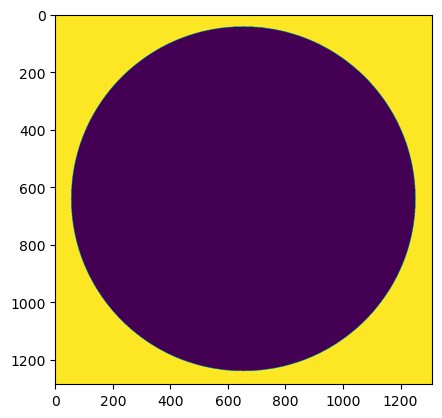

In [18]:
ClearOtsu('./cloud_images/original/2021_12_07__11_15_00_crop.jpg')